<a href="https://colab.research.google.com/github/gangasris03/data-analytics-internship-elite-tech-2025/blob/main/Task4%E2%80%93Sentiment_Analysis_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install requirements
!pip install nltk seaborn

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Load dataset
df = pd.read_csv("/content/Reviews.csv")  # Replace with your actual filename
df = df[['Text', 'Score']].dropna()
df.columns = ['text', 'score']

In [6]:
# Convert Score to Sentiment

# Positive = 1 (score >= 4), Negative = 0 (score <= 2), Neutral (score = 3) will be dropped
def label_sentiment(score):
    if score >= 4:
        return 1
    elif score <= 2:
        return 0
    else:
        return None

df['sentiment'] = df['score'].apply(label_sentiment)
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].astype(int)

In [7]:
# Clean the review text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return " ".join([word for word in text.split() if word not in stop_words])

# Optional: use a sample for faster processing
df = df.sample(5000, random_state=42)

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

In [8]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Make Predictions
y_pred = model.predict(X_test)

🔹 Accuracy Score: 0.862

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.12      0.22       155
           1       0.86      1.00      0.92       845

    accuracy                           0.86      1000
   macro avg       0.88      0.56      0.57      1000
weighted avg       0.87      0.86      0.81      1000



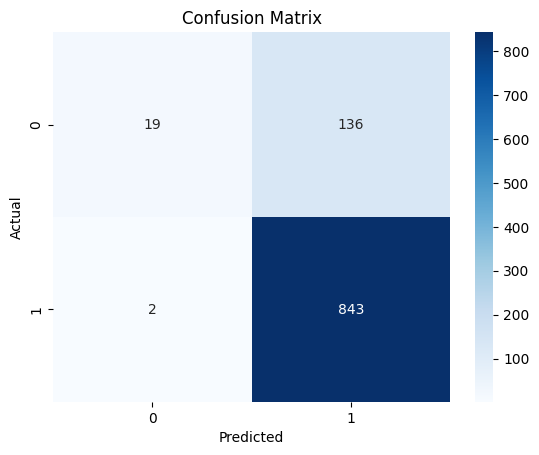

In [12]:
# Evaluate the Model
print("🔹 Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

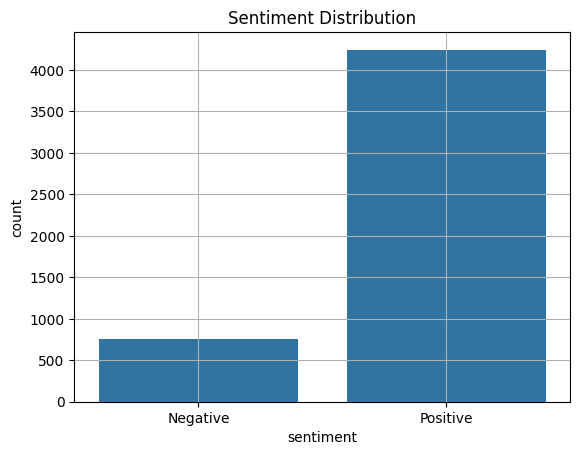

In [13]:
# Sentiment Distribution
sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(True)
plt.show()